In [ ]:
Hierarchical Clustering:-
    
Hierarchical Clustering ek unsupervised machine learning algorithm hai jo data points ko step-by-step hierarchy (levels) me arrange karta hai.

Output ek tree-like structure hota hai jise DENDROGRAM kehte hain.
1. No Need to Pre-define Clusters
K-Means me pehle se K batana padta hai

Hierarchical me pehle structure dikhta hai

Baad me decide karte hain cluster count

Very useful jab data unknown ho

2. Dendrogram Gives Deep Insight
Visual explanation milta hai

Distance clearly dikhta hai

Natural grouping samajh aata hai

Best for analysis + presentation

3. Good for Small & Medium Datasets
Jab data zyada bada na ho

Jab accuracy + interpretability chahiye

4. Real Relationship Capture
Pure structure preserve hota hai

Clusters ke beech relation samajh aata hai

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
df = pd.read_csv(r"C:\Users\Lenovo\Desktop\gaurav\titanic.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df = df[["Pclass", "Sex", "Age", "Fare"]]
df.dropna(inplace=True)

In [11]:
le = LabelEncoder()
df["Sex"] = le.fit_transform(df["Sex"])

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

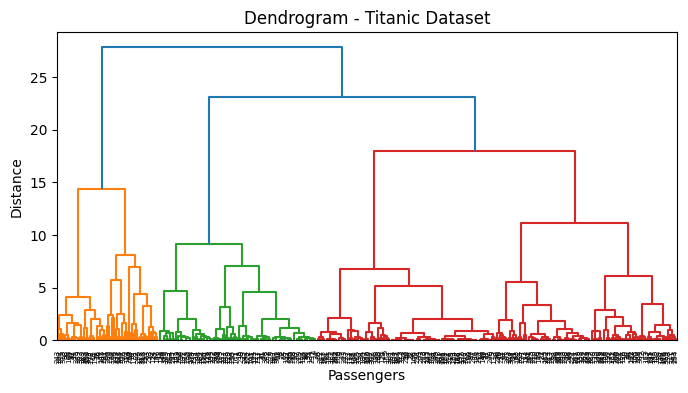

In [17]:
linked = linkage(X_scaled, method="ward")

plt.figure(figsize=(8, 4))
dendrogram(linked)
plt.title("Dendrogram - Titanic Dataset")
plt.xlabel("Passengers")
plt.ylabel("Distance")
plt.show()

In [ ]:
Interpretation
Vertical height = distance

Horizontal cut lagane par number of clusters decide karte hain Yahan se maan lo 2 clusters best lag rahe hain

In [14]:
hc = AgglomerativeClustering(n_clusters=2, linkage="ward")
clusters = hc.fit_predict(X_scaled)

df["Cluster"] = clusters
print(df.head())

   Pclass  Sex   Age     Fare  Cluster
0       3    1  34.5   7.8292        0
1       3    0  47.0   7.0000        0
2       2    1  62.0   9.6875        0
3       3    1  27.0   8.6625        0
4       3    0  22.0  12.2875        0


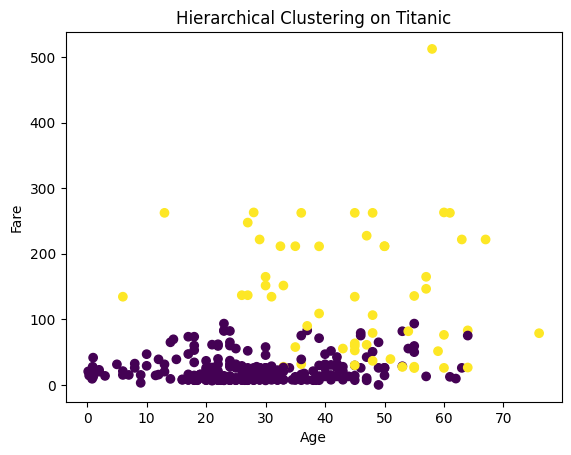

In [16]:
plt.figure()
plt.scatter(df["Age"], df["Fare"], c=df["Cluster"])
plt.xlabel("Age")
plt.ylabel("Fare")
plt.title("Hierarchical Clustering on Titanic")
plt.show()


In [ ]:
Types of Hierarchical Clustering
A. Agglomerative Clustering (Bottom-Up)
Kaam kaise karta hai:

Har data point = 1 cluster

Sabse nearest clusters merge hote hain

Process repeat hota hai

End me 1 cluster banta hai

✔ Practical ✔ Fast compared to divisive ✔ Industry standard

B. Divisive Clustering (Top-Down)
Kaam kaise karta hai:

Saara data = 1 cluster

Step-by-step split hota hai

Computationally expensive Rarely usedB. Divisive Clustering (Top-Down)

Distance & Linkage Methods (VERY IMPORTANT)
Distance Metrics
Euclidean (most common)

Manhattan

Cosine

Dendrogram Explained
Vertical axis → Distance

Horizontal axis → Data points

Cut line → Cluster count decide karta hai

Jahan large vertical gap ho → wahi best cut

When is Hierarchical Clustering BEST?
Best Use Cases
Small datasets

Exploratory Data Analysis (EDA)

Pattern discovery

Bioinformatics

Customer segmentation (premium analysis)

When NOT to Use
Very large datasets (10k+)
Real-time systems
Memory limited environments